In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas 

df = pandas.read_csv('../data_sets/family_data_set.csv')
df.head()

,value,mutant_name_index,kinetic_constant,rel_or_abs,scaffold
0,0.000000,0,kcat,rel,Q59976_4
1,0.000000,0,km,rel,Q59976_4
2,0.000000,0,kcatkm,rel,Q59976_4
3,0.286449,1,kcat,rel,Q59976_4
4,-2.528274,1,km,rel,Q59976_4


In [2]:
targets = 'kcat km kcatkm'.split()

def fmt(k):
    if k == 'kcat':
        return '$k_{\mathrm{cat}}$'
    elif k == 'km':
        return '$K_{\mathrm{M}}$'
    elif k == 'kcatkm':
        return '$k_{\mathrm{cat}}/K_{\mathrm{M}}$'

Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std'], dtype='object', name='scaffold')


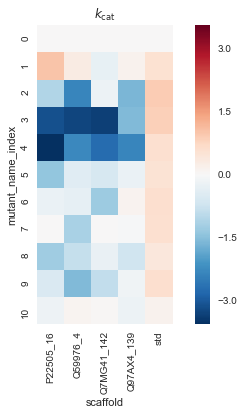

Mean of standard deviations (log10) 0.52 kcat
Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std'], dtype='object', name='scaffold')


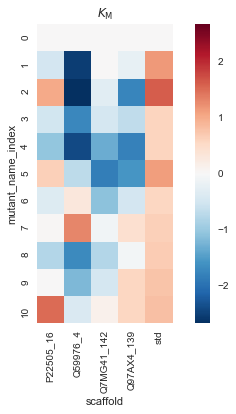

Mean of standard deviations (log10) 0.77 km
Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std'], dtype='object', name='scaffold')


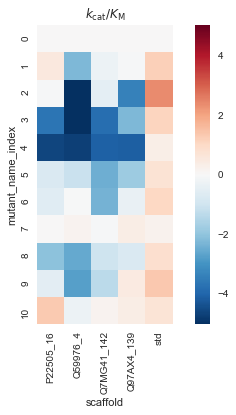

Mean of standard deviations (log10) 0.90 kcatkm


In [3]:
for target in targets:
    d = df[(df.kinetic_constant == target) & (df.rel_or_abs == 'rel')]
    p = d.pivot(columns='scaffold', values='value', index='mutant_name_index')
    p['std'] = p.std(axis=1)
#     p['mean'] = p.mean(axis=1)
    print(p.columns)
#     p['custom'] = p.map(custom, axis=1)
    plt.title(fmt(target))
    avg_std = '{0:2.2f}'.format(p['std'].mean())    
    sns.heatmap(p, square=1)
#     plt.plot(p['std'], p.index)
    plt.show()
    
    
    
    print('Mean of standard deviations (log10)', avg_std, target )


In [4]:
names = pandas.read_csv('../data_sets/names.csv', index_col=0)
names.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
names.T

0,P22505_16,Q7MG41_142,Q97AX4_139,Q59976_4
1,R240A,S246R,A281R,I241R
2,E222A,T230E,T264E,H223E
3,Y295W,Y298W,Y315W,Y295W
4,Q19A,Q27A,Q20A,Q18A
5,W325A,W326A,W354A,W342A
6,W120F,W128F,W150F,W120F
7,Y118F,Y126F,Y148F,Y118F
8,N293Q,N296Q,N313Q,N293Q
9,T352V,T353V,T379V,T368V
10,N220Y,N223Y,A262Y,N221Y


Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std', 'mean'], dtype='object', name='scaffold')


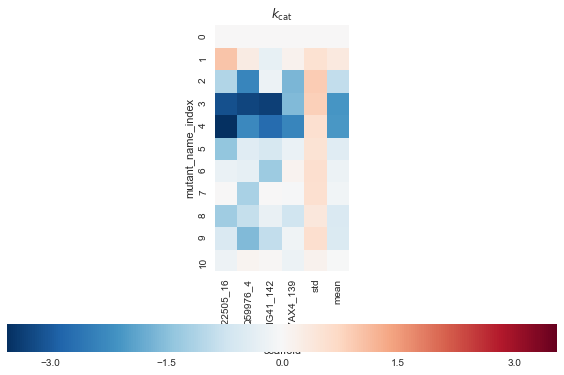

Mean of standard deviations (log10) 0.52 kcat
Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std', 'mean'], dtype='object', name='scaffold')


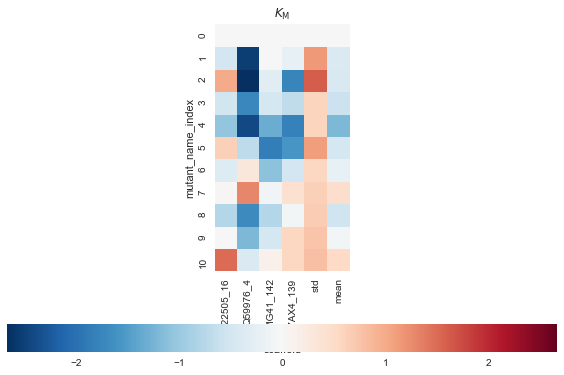

Mean of standard deviations (log10) 0.77 km
Index(['P22505_16', 'Q59976_4', 'Q7MG41_142', 'Q97AX4_139', 'std', 'mean'], dtype='object', name='scaffold')


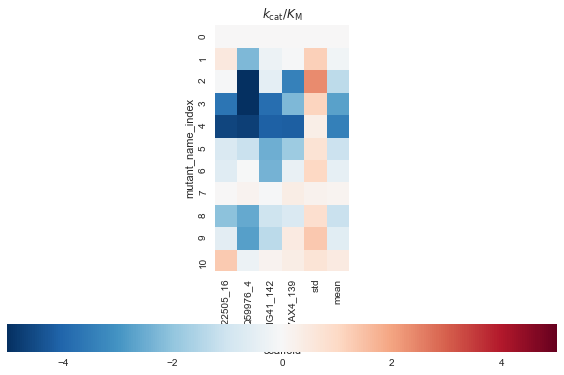

Mean of standard deviations (log10) 0.90 kcatkm


In [5]:
# now try adding mean and naems 

for target in targets:
    d = df[(df.kinetic_constant == target) & (df.rel_or_abs == 'rel')]
    p = d.pivot(columns='scaffold', values='value', index='mutant_name_index')
    p['std'] = p.std(axis=1)
    p['mean'] = p.mean(axis=1)
    print(p.columns)
#     p['custom'] = p.map(custom, axis=1)
    plt.title(fmt(target))
    avg_std = '{0:2.2f}'.format(p['std'].mean())    
    sns.heatmap(p, square=1, cbar_kws={"orientation": "horizontal"})
#     plt.plot(p['std'], p.index)
    plt.tight_layout()
    plt.show()
    
    
    
    print('Mean of standard deviations (log10)', avg_std, target )

